## Obs Station Metadata

In [88]:
import re
from obspy import UTCDateTime, read_inventory
from obspy.clients.nrl import NRL
from obspy.io.xseed import Parser
from obspy.core.inventory import Inventory, Network, Station, Channel, Site
from obspy.clients.fdsn import Client as FDSNClient


In [89]:
# could be replaced with a local download of NRL
nrl = NRL()

params=[]
loggos=[]

### Example to find out correct keys for given sensor in NRL

In [90]:
nrl.sensors

Select the sensor manufacturer (37 items):
  'CEA-DASE', 'CME (now R-Sensors)', 'Chaparral Physics',
  'DTCC (manuafacturers of SmartSolo)', 'EQMet', 'Eentec', 'GEObit',
  'GEOsig', 'Gem', 'Generic', 'Geo Space/OYO', 'Geodevice', 'Geotech'
  'Guralp', 'HGS Products', 'High Tech', 'Hyperion', 'IESE',
  'Johnson Infrasound', 'Kinemetrics', 'LaHusen', 'Lennartz',
  'Lunitek', 'Magseis Fairfield', 'Metrozet', 'Nanometrics',
  'R-Sensors (previously listed as CME', 'REF TEK',
  'Raspberry Shake (formerly OSOP)', 'SARA', 'Seismo Wave',
  'Sercel/Mark Products', 'Silicon Audio', 'SolGeo',
  'Sprengnether (now Eentec)', 'Streckeisen', 'iTem'

In [91]:
para1 = 'Nanometrics'

params.append(para1)
nrl.sensors[para1]

Select the Nanometrics sensor model (14 items):
  'Meridian Compact Posthole', 'Meridian Posthole',
  'Titan Accelerometer', 'Trillium 120 Horizon', 'Trillium 120P/PA',
  'Trillium 120Q/QA,PH,BH (Vault, Posthole or Borehole)',
  'Trillium 240', 'Trillium 360', 'Trillium 40',
  'Trillium All-Terrain', 'Trillium Cascadia Accelerometer',
  'Trillium Cascadia seismometer', 'Trillium Compact 120 (Vault,
  Posthole, OBS)', 'Trillium Compact 20 (Vault, Posthole, OBS)'

In [92]:
para2 = 'Trillium 120 Horizon'

params.append(para2)
nrl.sensors[para1][para2]

Select the Trillium Horizon 120 Version (2 items):
  'Trillium 120 Horizon', 'Trillium 120 Horizon V2'

In [93]:
para3 = 'Trillium 120 Horizon'

params.append(para3)
nrl.sensors[para1][para2][para3]

('Trillium Horizon 120, 120 s, 1200 V/m/s',
 'http://ds.iris.edu/NRL/sensors/nanometrics/RESP.XX.NS690..BHZ.TrilliumHorizon120.120.1203')

In [80]:
para4 = '2000 V/M/S'

params.append(para4)
nrl.sensors[para1][para2][para3][para4]

TypeError: tuple indices must be integers or slices, not str

In [94]:
nrl.dataloggers

Select the datalogger manufacturer (25 items):
  'Agecodagis', 'DAQ Systems (NetDAS)',
  'DTCC (manufacturers of SmartSolo', 'DiGOS/Omnirecs', 'EQMet',
  'Earth Data', 'Eentec', 'GEObit', 'Gem', 'Generic', 'GeoSIG',
  'Geodevice', 'Geotech', 'Guralp', 'Kinemetrics', 'Lunitek',
  'Magseis Fairfield', 'Nanometrics', 'Quanterra', 'R-Sensors',
  'REF TEK', 'Raspberry Shake (formerly OSOP)', 'Seismic Source',
  'Sercel', 'SolGeo'

In [95]:
loggo1 = 'Nanometrics'

loggos.append(loggo1)
nrl.dataloggers[loggo1]

Select the Nanometrics model (11 items):
  'Centaur', 'Centaur High Gain', 'Europa T', 'HRD-24',
  'Meridian Compact', 'Meridian Posthole', 'Orion', 'Taurus',
  'Titan SMA', 'Trident', 'Trident 305'

In [96]:
loggo2 = 'Centaur'

loggos.append(loggo2)
nrl.dataloggers[loggo1][loggo2]

Select the input range (gain) for this Centaur datalogger (6 items):
  '1 Vpp (40)', '10 Vpp (4)', '2 Vpp (20)', '20 Vpp (2)', '4 Vpp (10)'
  '40 Vpp (1)'

In [97]:
loggo3 = '10 Vpp (4)'
# loggo3 = '10 Vpp (4)'

loggos.append(loggo3)
nrl.dataloggers[loggo1][loggo2][loggo3]

Select whether the DC removal filter is on (corner at 1 mHz) (2 items):
  '1 mHz', 'Off'

In [98]:
loggo4 = 'Off'
# loggo4 = '1 mHz'

loggos.append(loggo4)
nrl.dataloggers[loggo1][loggo2][loggo3][loggo4]

Select final filter type (2 items):
  'Linear phase', 'Minimum phase'

In [99]:
loggo5 = 'Minimum phase'
# loggo5 = 'Linear phase'

loggos.append(loggo5)
nrl.dataloggers[loggo1][loggo2][loggo3][loggo4][loggo5]

Select the sample rate in samples per second (14 items):
  '1', '10', '100', '1000', '125', '2', '20', '200', '250', '40', '5'
  '50', '500', '5000'

In [100]:
loggo6 = '200'

loggos.append(loggo6)
nrl.dataloggers[loggo1][loggo2][loggo3][loggo4][loggo5][loggo6]

('Centaur, 10 vpp (gain 4), 200 sps, DC removal filter off, Minimum phase',
 'http://ds.iris.edu/NRL/dataloggers/nanometrics/centaur/RESP.XX.NN842..HHZ.CENTAUR.4.200.OFF.MP')

No handles with labels found to put in legend.


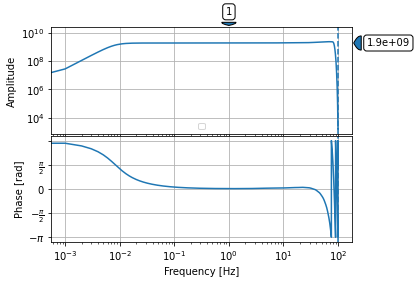

In [101]:
response = nrl.get_response(
                            datalogger_keys=loggos,
                            sensor_keys=params
                           )

response.plot(0.001);

### Prepare Writing XML-File

In [102]:
net = input("\nEnter network: ");print("\n_______________________________")

sta = input("\nEnter station name: ");print("\n_______________________________")

site_name = input("\nEnter site name: ");print("\n_______________________________")

serial_number = input("\nEnter serial number: ");print("\n_______________________________")

sampling_rate = input("\nEnter sampling rate: ");print("\n_______________________________")

outpath = input("\nEnter path of output file: ");print("\n_______________________________")

location = input("\nSpecify location (y/n)? ")

if location == "y" or location == "yes":
    lat = input("Enter latitude: ")
    lon = input("Enter longitude: ")
    ele = input("Enter elevation: ")
    
else:
    lat, lon, ele = 0.0, 0.0, 0.0

outfile = f"{serial_number}_{sta}.xml"


Enter network: BW

_______________________________

Enter station name: 

_______________________________

Enter site name: OBS

_______________________________

Enter serial number: horizon

_______________________________

Enter sampling rate: 200

_______________________________

Enter path of output file: /home/andbro/Desktop/Huddle_Test/

_______________________________

Specify location (y/n)? n


In [103]:
channel1 = Channel(code='HHZ', 
                   location_code='', 
                   latitude=lat, 
                   longitude=lon,
                   elevation=ele, 
                   depth=0,
#                    azimuth=0,
#                    dip=-90,
                   sample_rate=sampling_rate,
                   response=response,
                  )

channel2 = Channel(code='HHN', 
                   location_code='', 
                   latitude=lat, 
                   longitude=lon,
                   elevation=ele, 
                   depth=0,
#                    azimuth=0,
#                    dip=0,
                   sample_rate=sampling_rate,
                   response=response,
                  )

channel3 = Channel(code='HHE', 
                   location_code='', 
                   latitude=lat, 
                   longitude=lon,
                   elevation=ele, 
                   depth=0,
#                    azimuth=90,
#                    dip=0,
                   sample_rate=sampling_rate,
                   response=response,
                  )

In [104]:
site = Site(name=site_name)


station = Station(code=sta, 
                  latitude=lat, 
                  longitude=lon,
                  elevation=ele,
                  channels=[channel1,channel2,channel3],
                  site=site,
                 )

network = Network(code=net,
                  stations=[station],
                 )


inv = Inventory(networks=[network], 
                source='LMU',
               )


if outpath[-1] == "/":
    outpath = outpath[:-1]
    
inv.write(f"{outpath}/{outfile}", format='STATIONXML')

In [105]:
try:
    read_inventory(f"{outpath}/{outfile}")
    print("\n DONE")
except:
    print("\n Something went wrong! File: {outpath}/{outfile} could not be loaded!")


 DONE
